In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


#data cleaning

In [ ]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[zero_cols] = df[zero_cols].replace(0, np.nan)

In [ ]:
print("Missing values before filling:")
print(df.isnull().sum())

Missing values before filling:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
for col in zero_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [ ]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df.to_csv('cleaned_diabetes_dataset.csv', index=False)

In [ ]:
print("Sample of cleaned data:")
print(df.head())

Sample of cleaned data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#training the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[78 21]
 [18 37]]


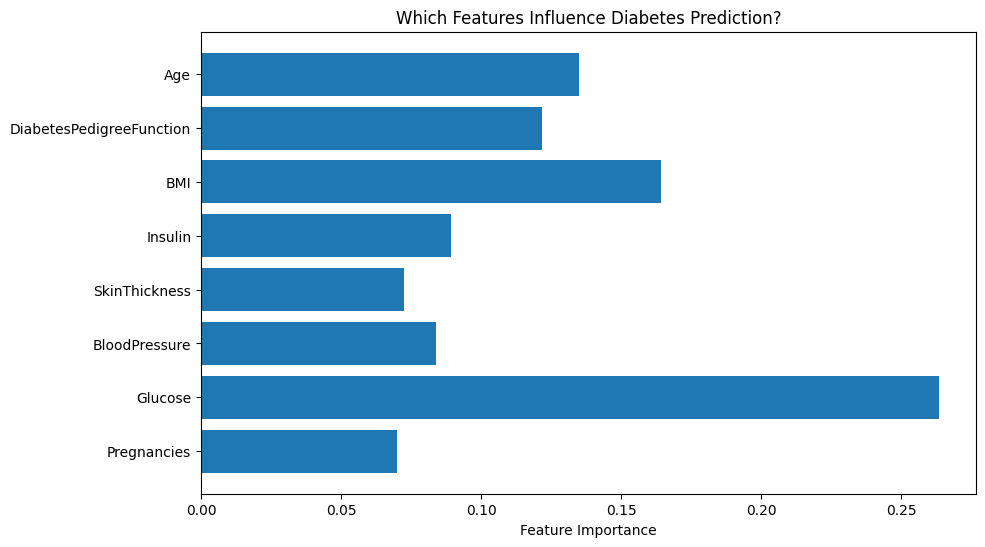

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Features Influence Diabetes Prediction?")
plt.show()

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_log_pred = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_log_pred))
print("\nClassification Report:\n", classification_report(y_test, y_log_pred))

Logistic Regression Results:
Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



<Figure size 600x400 with 0 Axes>

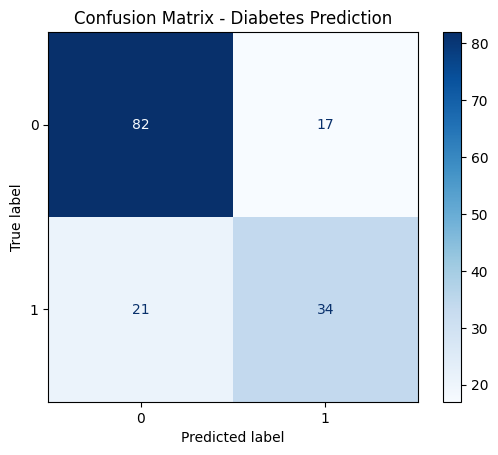

In [ ]:
cm = confusion_matrix(y_test, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Diabetes Prediction")
plt.show()

In [ ]:
joblib.dump(log_model, 'logistic_regression_diabetes.pkl')

['logistic_regression_diabetes.pkl']

In [ ]:

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age']

sample_input = pd.DataFrame([[2, 120, 70, 28, 100, 30.0, 0.5, 28]], columns=columns)

prediction = model.predict(sample_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic


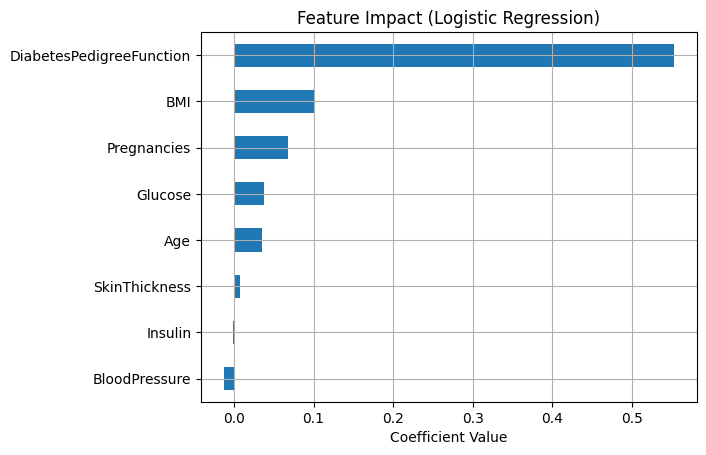

In [ ]:
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', title='Feature Impact (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.grid()
plt.show()